In [80]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
import scipy.stats
from statsmodels.tsa.ar_model import AR
%matplotlib inline
import tabulate
import latextable
import python_to_latex as p2l
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from IPython.display import display, Markdown

In [8]:
fpath = 'OECD_CCI.csv'
CCI = pd.read_csv(fpath)
CCI.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,USA,CCI,AMPLITUD,LTRENDIDX,M,1995-12,100.3772,NaN
1,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-01,100.3960,NaN
2,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-02,100.4778,NaN
3,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-03,100.6446,NaN
4,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-04,100.6775,NaN


In [9]:
pd.unique(CCI["LOCATION"])

array(['USA'], dtype=object)

In [10]:
CCI =CCI[CCI['LOCATION'] == 'USA']

In [11]:
CCI['Value'].describe()

count    306.000000
mean     100.181919
std        1.684245
min       96.163920
25%       99.007355
50%      100.512250
75%      101.357700
max      103.145700
Name: Value, dtype: float64

In [12]:
CCI.index = CCI['TIME']
CCI.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
TIME,,,,,,,,
1995-12,USA,CCI,AMPLITUD,LTRENDIDX,M,1995-12,100.3772,NaN
1996-01,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-01,100.3960,NaN
1996-02,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-02,100.4778,NaN
1996-03,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-03,100.6446,NaN
1996-04,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-04,100.6775,NaN


In [13]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(CCI['Value'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.742929
p-value                          0.409141
#Lags Used                       4.000000
Number of Observations Used    301.000000
Critical Value (1%)             -3.452263
Critical Value (5%)             -2.871191
Critical Value (10%)            -2.571912
dtype: float64


In [14]:
CCI['DeltaCCI'] = CCI['Value'] -CCI['Value'].shift(1)
CCI.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,DeltaCCI
TIME,,,,,,,,,
1995-12,USA,CCI,AMPLITUD,LTRENDIDX,M,1995-12,100.3772,NaN,NaN
1996-01,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-01,100.3960,NaN,0.0188
1996-02,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-02,100.4778,NaN,0.0818
1996-03,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-03,100.6446,NaN,0.1668
1996-04,USA,CCI,AMPLITUD,LTRENDIDX,M,1996-04,100.6775,NaN,0.0329


In [15]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(CCI['DeltaCCI'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -8.441753e+00
p-value                        1.755572e-13
#Lags Used                     3.000000e+00
Number of Observations Used    3.010000e+02
Critical Value (1%)           -3.452263e+00
Critical Value (5%)           -2.871191e+00
Critical Value (10%)          -2.571912e+00
dtype: float64


In [16]:
SnP_monthly = web.get_data_yahoo('^GSPC','01/01/2000','05/01/2021',interval='m')
SnP_monthly.index = SnP_monthly.index.strftime('%Y-%m')
SnP_monthly['LogReturn'] = np.log(SnP_monthly['Adj Close']/SnP_monthly['Adj Close'].shift(1))


In [126]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(SnP_monthly['LogReturn'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.472115e+01
p-value                        2.750678e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.550000e+02
Critical Value (1%)           -3.456257e+00
Critical Value (5%)           -2.872942e+00
Critical Value (10%)          -2.572846e+00
dtype: float64


In [18]:
Granger_data_monthly = pd.merge(SnP_monthly,CCI, how= 'inner', left_index=True, right_index=True)

In [47]:
Granger_data_monthly['Log Close Price'] = np.log(Granger_data_monthly['Adj Close'])

In [48]:
desc = Granger_data_monthly[['Value', 'Log Close Price']].describe()
print(desc.to_latex())

\begin{tabular}{lrr}
\toprule
{} &       Value &  Log Close Price \\
\midrule
count &  257.000000 &       257.000000 \\
mean  &   99.833271 &         7.356374 \\
std   &    1.583125 &         0.395418 \\
min   &   96.163920 &         6.599993 \\
25\%   &   98.658580 &         7.061643 \\
50\%   &  100.145800 &         7.244677 \\
75\%   &  101.022000 &         7.642769 \\
max   &  103.145700 &         8.343818 \\
\bottomrule
\end{tabular}



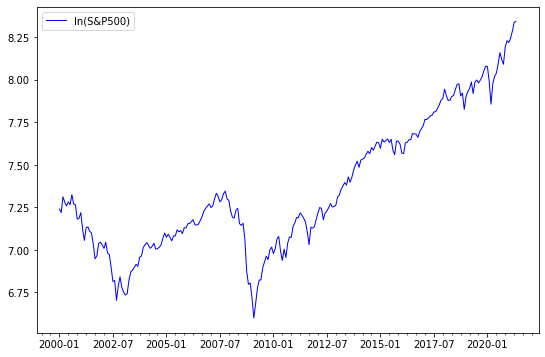

In [72]:
fig, ax = plt.subplots()

ax.plot(Granger_data_monthly['Log Close Price'], color = 'b', linewidth = 1, label = 'ln(S&P500)')
ax.legend()
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

#  Тоже самое проделываем с делениями на оси "y":
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))


fig.set_figwidth(9)
fig.set_figheight(6)
fig.savefig('lnSnPmnth.pdf')

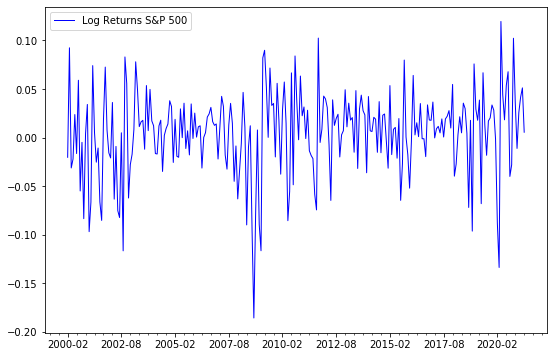

In [121]:
fig, ax = plt.subplots()

ax.plot(Granger_data_monthly['LogReturn'].dropna(), color = 'b', linewidth = 1, label = 'Log Returns S&P 500')
ax.legend()

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))

ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))




fig.set_figwidth(9)
fig.set_figheight(6)
fig.savefig('logReturnsMnth.pdf')

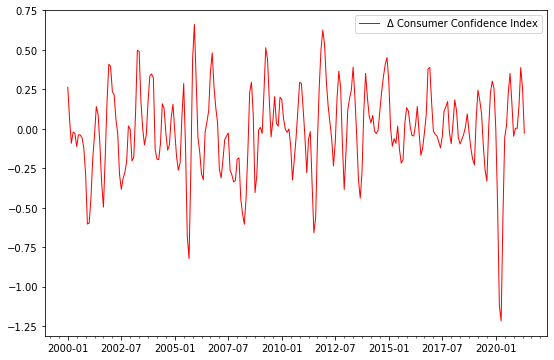

In [125]:
fig, ax = plt.subplots()

ax.plot(Granger_data_monthly['DeltaCCI'].dropna(), color = 'r', linewidth = 1, label = 'Δ Consumer Confidence Index')
ax.legend()

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))

ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))


fig.set_figwidth(9)
fig.set_figheight(6)
fig.savefig('DeltaCCI.pdf')

In [ ]:
fig, ax = plt.subplots()

ax.plot(Granger_data_monthly['Value'].dropna(), color = 'r', linewidth = 1, label = 'Consumer Confidence Index')
ax.legend()
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
#  Устанавливаем интервал вспомогательных делений:
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))

#  Тоже самое проделываем с делениями на оси "y":
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))


fig.set_figwidth(9)
fig.set_figheight(6)
fig.savefig('CCI.pdf')

In [112]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(Granger_data_monthly['LogReturn'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput.to_latex())

Results of Dickey-Fuller Test:
\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
Test Statistic              &  -14.7211 \\
p-value                     &    0.0000 \\
\#Lags Used                  &    0.0000 \\
Number of Observations Used &  255.0000 \\
Critical Value (1\%)         &   -3.4563 \\
Critical Value (5\%)         &   -2.8729 \\
Critical Value (10\%)        &   -2.5728 \\
\bottomrule
\end{tabular}



In [114]:
SnP_daily = web.get_data_yahoo('^GSPC','01/01/2000','05/01/2021',interval='d')
print('Results of Dickey-Fuller Test:')
dftest = adfuller(np.log(SnP_daily['Adj Close']/SnP_daily['Adj Close'].shift(1)).dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -13.5468
p-value                           0.0000
#Lags Used                       33.0000
Number of Observations Used    5331.0000
Critical Value (1%)              -3.4316
Critical Value (5%)              -2.8621
Critical Value (10%)             -2.5671
dtype: float64


In [123]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(Granger_data_monthly['DeltaCCI'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput.to_latex())


Results of Dickey-Fuller Test:
\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
Test Statistic              &   -7.8268 \\
p-value                     &    0.0000 \\
\#Lags Used                  &    3.0000 \\
Number of Observations Used &  253.0000 \\
Critical Value (1\%)         &   -3.4565 \\
Critical Value (5\%)         &   -2.8730 \\
Critical Value (10\%)        &   -2.5729 \\
\bottomrule
\end{tabular}



In [133]:
print(pd.DataFrame(np.log(SnP_daily['Adj Close']/SnP_daily['Adj Close'].shift(1)).describe()).transpose().to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &      mean &       std &       min &       25\% &       50\% &       75\% &       max \\
\midrule
Adj Close &  5365.0 &  0.000197 &  0.012509 & -0.127652 & -0.004748 &  0.000598 &  0.005822 &  0.109572 \\
\bottomrule
\end{tabular}



In [ ]:
print(pd.DataFrame(Granger_data_monthly['LogReturn'].describe()).transpose().to_latex())

In [90]:
def grangerTest(exog, endog):
    MAX_LAG = 30
    ARaic = AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numExog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for exog data is " + str(numExog))

    ARaic = AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numEndog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for endog data is " + str(numEndog))

    # now that I know the optimal number of parameters, I can call the
    # granger causality function of statsmodels.
    data = pd.concat([endog, exog], axis=1)
    print ("\nGranger causality results of indep onto dep")
    results = grangercausalitytests(data, maxlag=numEndog)

    data = pd.concat([exog, endog], axis=1)
    print ("\nGranger causality results of dep onto indep")
    results = grangercausalitytests(data, maxlag=numExog)
    regr = results[2][1]
    print (regr[0].params)
    print (regr[1].params)
    print (regr[1].pvalues)
    
grangerTest(Granger_data_monthly['DeltaCCI'][2:], Granger_data_monthly['LogReturn'][2:])

Optimal number of lags for exog data is 5
Optimal number of lags for endog data is 2

Granger causality results of indep onto dep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2807  , p=0.5968  , df_denom=187, df_num=1
ssr based chi2 test:   chi2=0.2852  , p=0.5933  , df=1
likelihood ratio test: chi2=0.2850  , p=0.5934  , df=1
parameter F test:         F=0.2807  , p=0.5968  , df_denom=187, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7382  , p=0.4794  , df_denom=184, df_num=2
ssr based chi2 test:   chi2=1.5165  , p=0.4685  , df=2
likelihood ratio test: chi2=1.5104  , p=0.4699  , df=2
parameter F test:         F=0.7382  , p=0.4794  , df_denom=184, df_num=2

Granger causality results of dep onto indep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.2651 , p=0.0004  , df_denom=187, df_num=1
ssr based chi2 test:   chi2=13.4779 , p=0.0002  , df=1
likelihood ratio test: chi2=13.0214 , p=0.0003 

C:\Users\Windows\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


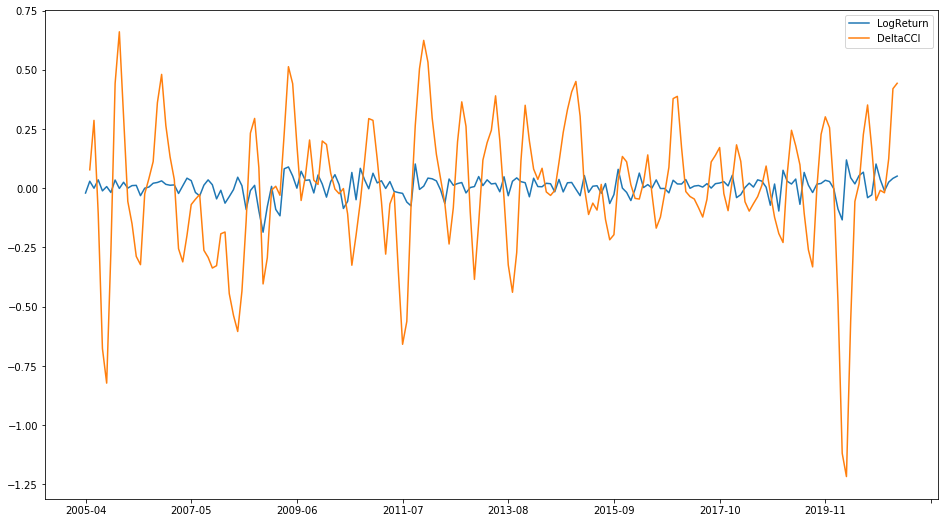

In [80]:
Granger_data_monthly['ValueStd'] = (Granger_data_monthly['Value'] - Granger_data_monthly['Value'].mean())/Granger_data_monthly['Value'].std()
Granger_data_monthly['PriceStd'] = (Granger_data_monthly['Adj Close'] - Granger_data_monthly['Adj Close'].mean())/Granger_data_monthly['Adj Close'].std()

Granger_data_monthly[['LogReturn','DeltaCCI']].plot(legend=True, figsize=(16,9))

In [81]:
corr = Granger_data_monthly[['LogReturn', 'DeltaCCI']].corr()
corr.style.background_gradient(cmap='coolwarm')

,LogReturn,DeltaCCI
LogReturn,1.000000,0.215893
DeltaCCI,0.215893,1.000000


In [82]:
pvals = [] 
for col in ['DeltaCCI']:
    pvals.append(scipy.stats.linregress(Granger_data_monthly[col][1:], Granger_data_monthly['LogReturn'][1:].dropna())[3])
corr_signif = pd.DataFrame(pvals,columns = ['p-value']
                           ,index = ['Value'])
corr_signif

,p-value
Value,0.002634


In [73]:
Granger_data_monthly['Lag1_LogReturn'] = Granger_data_monthly['LogReturn'].shift(1)
Granger_data_monthly['Lag2_LogReturn'] = Granger_data_monthly['LogReturn'].shift(2)
Granger_data_monthly['Lag3_LogReturn'] = Granger_data_monthly['LogReturn'].shift(3)
Granger_data_monthly['Lag1_DeltaCCI'] = Granger_data_monthly['DeltaCCI'].shift(1)
Granger_data_monthly['Lag2_DeltaCCI'] = Granger_data_monthly['DeltaCCI'].shift(2)
Granger_data_monthly['Lag3_DeltaCCI'] = Granger_data_monthly['DeltaCCI'].shift(3)
Granger_data_monthly.head()

,High,Low,Open,Close,Volume,Adj Close,LogReturn,LOCATION,INDICATOR,SUBJECT,...,Value,Flag Codes,DeltaCCI,Log Close Price,Lag1_LogReturn,Lag2_LogReturn,Lag3_LogReturn,Lag1_DeltaCCI,Lag2_DeltaCCI,Lag3_DeltaCCI
2000-01,1478.000000,1350.140015,1469.250000,1394.459961,21494400000,1394.459961,NaN,USA,CCI,AMPLITUD,...,103.0855,NaN,0.2628,7.240262,NaN,NaN,NaN,NaN,NaN,NaN
2000-02,1444.550049,1325.069946,1394.459961,1366.420044,20912000000,1366.420044,-0.020313,USA,CCI,AMPLITUD,...,103.1457,NaN,0.0602,7.219949,NaN,NaN,NaN,0.2628,NaN,NaN
2000-03,1552.869995,1346.619995,1366.420044,1498.579956,26156200000,1498.579956,0.092324,USA,CCI,AMPLITUD,...,103.0535,NaN,-0.0922,7.312273,-0.020313,NaN,NaN,0.0602,0.2628,NaN
2000-04,1527.189941,1339.400024,1498.579956,1452.430054,20106460000,1452.430054,-0.031280,USA,CCI,AMPLITUD,...,103.0324,NaN,-0.0211,7.280993,0.092324,-0.020313,NaN,-0.0922,0.0602,0.2628
2000-05,1481.510010,1361.089966,1452.430054,1420.599976,19898300000,1420.599976,-0.022159,USA,CCI,AMPLITUD,...,103.0036,NaN,-0.0288,7.258835,-0.031280,0.092324,-0.020313,-0.0211,-0.0922,0.0602


In [79]:
from sklearn import linear_model
import statsmodels.api as sm
regr = linear_model.LinearRegression()

X = Granger_data_monthly[['Lag1_LogReturn','Lag2_LogReturn','Lag3_LogReturn'
                          ,'Lag1_DeltaCCI','Lag2_DeltaCCI','Lag3_DeltaCCI']][4:]
Y = Granger_data_monthly['DeltaCCI'][4:]

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model.as_latex())



\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &     DeltaCCI     & \textbf{  R-squared:         } &     0.781   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.776   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     146.3   \\
\textbf{Date:}             & Mon, 21 Jun 2021 & \textbf{  Prob (F-statistic):} &  3.42e-78   \\
\textbf{Time:}             &     01:56:57     & \textbf{  Log-Likelihood:    } &    162.81   \\
\textbf{No. Observations:} &         253      & \textbf{  AIC:               } &    -311.6   \\
\textbf{Df Residuals:}     &         246      & \textbf{  BIC:               } &    -286.9   \\
\textbf{Df Model:}         &           6      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                         & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\


In [57]:
print(regr.coef_)

[ 0.70745512 -0.29658616  0.00252062 -0.0014431 ]


In [96]:
result = grangercausalitytests(Granger_data_monthly[['DeltaCCI','LogReturn']].dropna(),2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.5497 , p=0.0003  , df_denom=188, df_num=1
ssr based chi2 test:   chi2=13.7660 , p=0.0002  , df=1
likelihood ratio test: chi2=13.2925 , p=0.0003  , df=1
parameter F test:         F=13.5497 , p=0.0003  , df_denom=188, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.6705  , p=0.0041  , df_denom=185, df_num=2
ssr based chi2 test:   chi2=11.6476 , p=0.0030  , df=2
likelihood ratio test: chi2=11.3045 , p=0.0035  , df=2
parameter F test:         F=5.6705  , p=0.0041  , df_denom=185, df_num=2


In [97]:
type(result)

dict

In [113]:
print(result[2][1][1].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     152.7
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           1.75e-57
Time:                        20:53:00   Log-Likelihood:                 110.05
No. Observations:                 190   AIC:                            -210.1
Df Residuals:                     185   BIC:                            -193.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2124      0.055     21.932      0.0